In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Employee.csv')

In [3]:
data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [4]:
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [7]:
data.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [9]:
data.shape

(4653, 9)

In [10]:
data.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [11]:
duplicates = data.duplicated().sum()
data = data.drop_duplicates()

print('No. of duplicate records :',duplicates)
print('Shape after dropping duplicate records :',data.shape)

No. of duplicate records : 1889
Shape after dropping duplicate records : (2764, 9)


In [12]:
data.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000
mean,2015.090449,2.636035,30.952967,2.644356,0.393632
std,1.885943,0.624001,5.108872,1.610610,0.488643
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,2.000000,27.000000,1.000000,0.000000
50%,2015.000000,3.000000,30.000000,2.000000,0.000000
75%,2017.000000,3.000000,35.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


<ipython-input-13-2580ffced89a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


<Axes: >

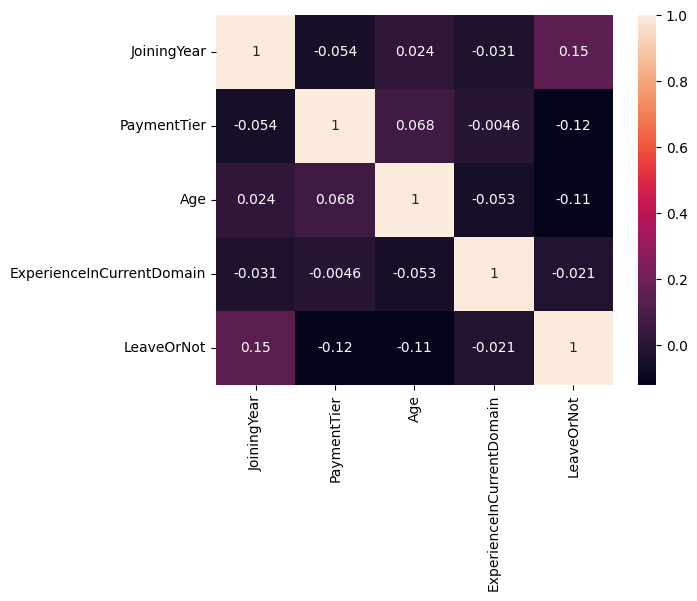

In [13]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)

 'PaymentTier' & 'Age' have a very weak negative correlation with Our Target variable ('LeaveOrNot')

'JoiningYear' has a very weak positive correlation with Target variable ('LeaveOrNot')

<ipython-input-14-cd6b02509341>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['JoiningYear'] = data['JoiningYear'].astype('object')


<Axes: xlabel='JoiningYear', ylabel='count'>

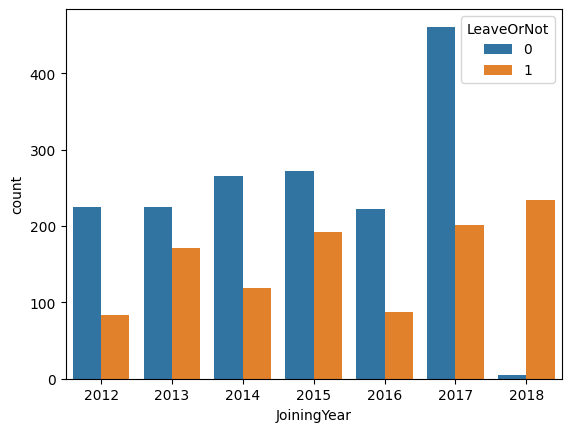

In [14]:
data['JoiningYear'] = data['JoiningYear'].astype('object')
sns.countplot(data = data ,x='JoiningYear',hue='LeaveOrNot')

Majority of the Employees joined in 2018 has left the company

<Axes: xlabel='EverBenched', ylabel='count'>

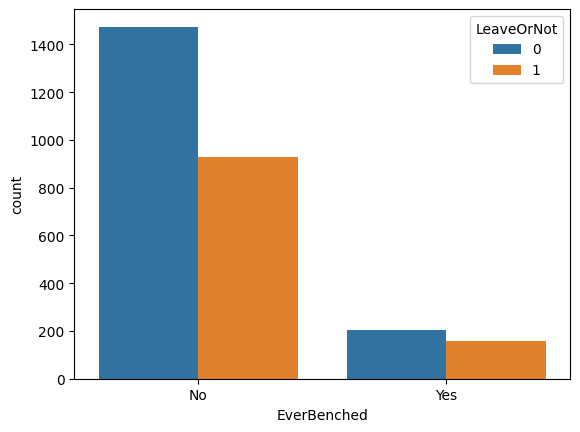

In [16]:
sns.countplot(data = data ,x='EverBenched',hue='LeaveOrNot')

The Employees being Benched on working projects have not left the company

<Axes: xlabel='ExperienceInCurrentDomain', ylabel='count'>

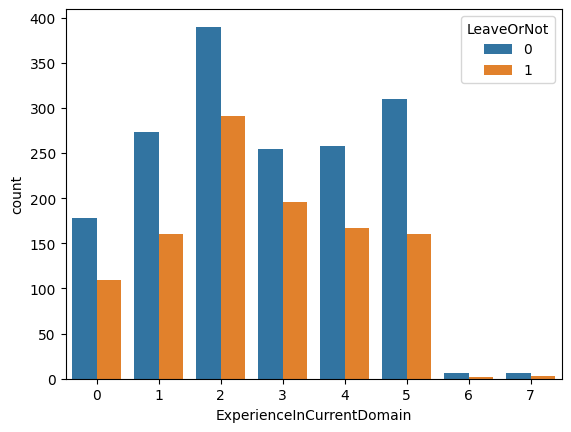

In [17]:
sns.countplot(data = data ,x='ExperienceInCurrentDomain',hue='LeaveOrNot')


*   There is not much data available where Employees having Experience in their Current Domain Greater than 5 Years
*   As the experience of Employees increases they chose to work/stay with company

<Axes: xlabel='Gender', ylabel='count'>

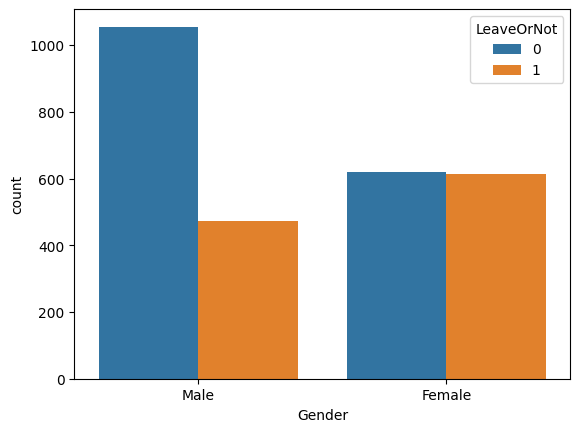

In [18]:
sns.countplot(data = data ,x='Gender',hue='LeaveOrNot')

Majority of the Male Employees choose not to leave the company
While the ratio ( Leave / Not Leave ) of the Female Employees is almost equal to 1

<ipython-input-19-aadc4451bf64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PaymentTier'] = data['PaymentTier'].astype('category')


<Axes: xlabel='PaymentTier', ylabel='count'>

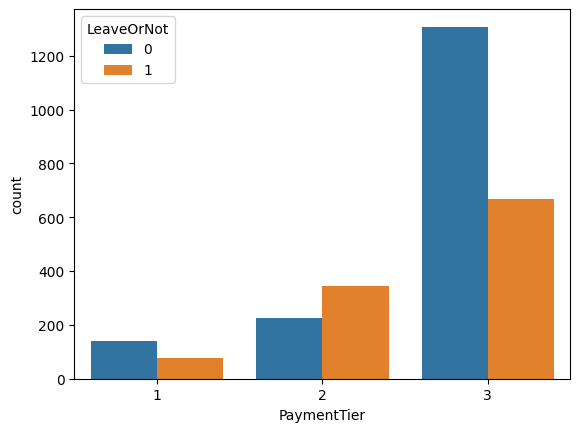

In [19]:
data['PaymentTier'] = data['PaymentTier'].astype('category')
sns.countplot(data = data ,x='PaymentTier',hue='LeaveOrNot')


Most of the Employees are having payment Tier 3

By observing the trend it seems that 'PaymentTier' Catergory is an Ordinal Variable
Where, Tier 3 > Tier 2 > Tier 1

<Axes: xlabel='City', ylabel='count'>

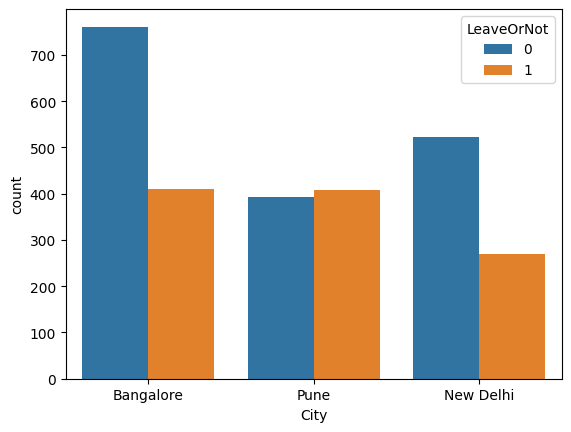

In [20]:
sns.countplot(data = data ,x='City',hue='LeaveOrNot')

Majority of the Employees residing / Working in Bangalore & New Delhi chose not to leave the company

Maybe the work culture in Bangalore & New Delhi is pretty good when compared to Pune

<Axes: xlabel='Education', ylabel='count'>

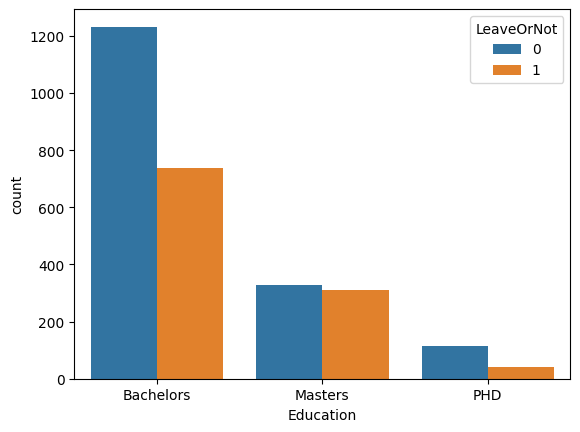

In [21]:
sns.countplot(data = data ,x='Education',hue='LeaveOrNot')

<ipython-input-23-8d98e0af1da7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AgeGroup'] = pd.qcut(data['Age'], q=3, labels=groups)


<Axes: xlabel='AgeGroup', ylabel='count'>

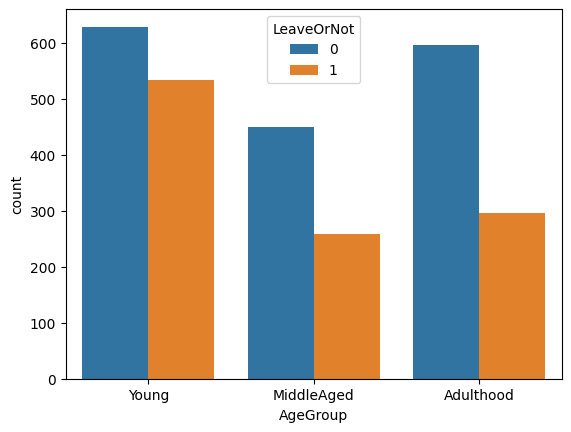

In [23]:
groups = ['Young', 'MiddleAged', 'Adulthood']
data['AgeGroup'] = pd.qcut(data['Age'], q=3, labels=groups)
sns.countplot(data = data ,x='AgeGroup',hue='LeaveOrNot')

From the bar chart , it is clear that Young Employees left their jobs more than the MiddleAged & Adulthood Employees.
Maybe young employees who leave want to pursue their dreams